In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

In [3]:
page = requests.get(url)

In [4]:
soup = BeautifulSoup(page.text,'html')

In [5]:
# print(soup.prettify())

In [6]:
table = soup.find_all('table', class_=['wikitable', 'sortable', 'jquery-tablesorter'])[0] #table extraction

In [7]:
# print(table.prettify())

In [8]:
headers = table.find_all('th') #header extraction

In [9]:
table_headers = [heading.text.strip() for heading in headers]

In [10]:
print(table_headers)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [11]:
df = pd.DataFrame(columns = table_headers)

In [12]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [13]:
data_rows = table.find_all('tr')

In [14]:
for row in data_rows:
    row_data = row.find_all('td')
    if row_data:
        individual_row = [data.text.strip() for data in row_data]
        length = len(df)
        df.loc[length] = individual_row

In [15]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"


In [16]:
df.tail()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"
99,100,Best Buy,Retail,"43,452",-6.1%,"85,000","Richfield, Minnesota"


In [17]:
df.isna().sum()

Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64

In [18]:
df.isnull().sum()

Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(100, 7)

In [21]:
df.dtypes

Rank                      object
Name                      object
Industry                  object
Revenue (USD millions)    object
Revenue growth            object
Employees                 object
Headquarters              object
dtype: object

In [22]:
df.columns = df.columns.str.replace(' ', '_')

In [23]:
df.head()

,Rank,Name,Industry,Revenue_(USD_millions),Revenue_growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"


In [24]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x) #trimming

In [25]:
#data type conversion
df['Revenue_growth'] = df['Revenue_growth'].str.replace('%','').astype(float)
df['Revenue_(USD_millions)'] = df['Revenue_(USD_millions)'].str.replace(',','').astype(int)
df['Employees'] = df['Employees'].str.replace(',','').astype(int)
df['Rank'] = df['Rank'].astype(int)

In [26]:
df.head()

,Rank,Name,Industry,Revenue_(USD_millions),Revenue_growth,Employees,Headquarters
0,1,Walmart,Retail,648125,6.0,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,574785,11.9,1525000,"Seattle, Washington"
2,3,Apple,Electronics industry,383482,-2.8,161000,"Cupertino, California"
3,4,UnitedHealth Group,Healthcare,371622,14.6,440000,"Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,364482,20.7,396500,"Omaha, Nebraska"


In [27]:
df.dtypes

Rank                        int64
Name                       object
Industry                   object
Revenue_(USD_millions)      int64
Revenue_growth            float64
Employees                   int64
Headquarters               object
dtype: object

In [28]:
# df.to_csv('companies_revenue.csv',index = False)

In [29]:
df.max()

Rank                                           100
Name                      World Kinect Corporation
Industry                            Transportation
Revenue_(USD_millions)                      648125
Revenue_growth                               125.9
Employees                                  2100000
Headquarters              Woonsocket, Rhode Island
dtype: object

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

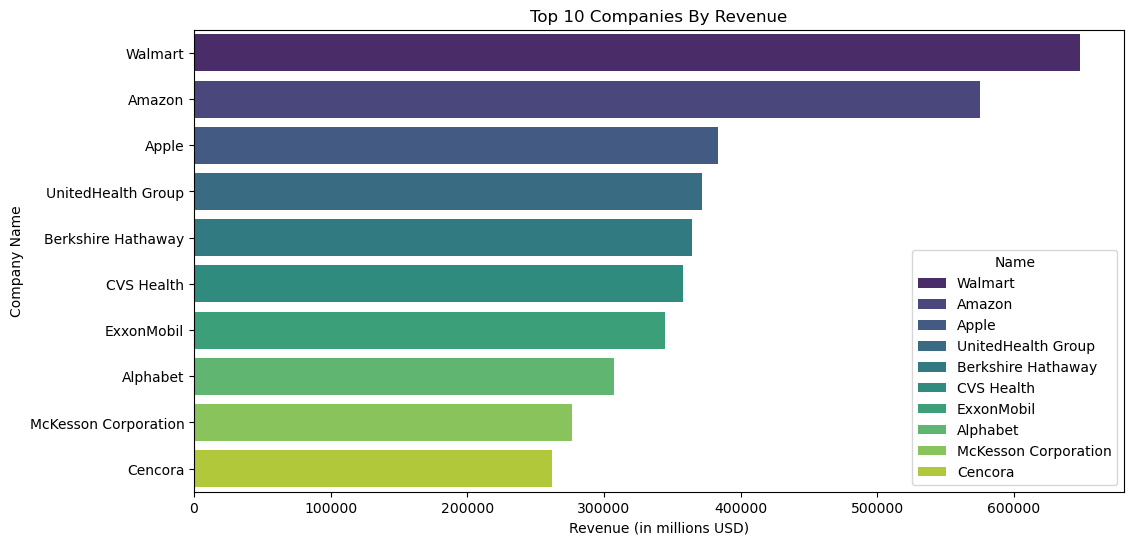

In [40]:
top_companies = df.nlargest(10, 'Revenue_(USD_millions)')
plt.figure(figsize = (12,6))
sns.barplot(data = top_companies, x = 'Revenue_(USD_millions)', y = 'Name', hue = 'Name', palette = 'viridis', legend = True)
plt.xlabel('Revenue (in millions USD)')
plt.ylabel('Company Name')
plt.title('Top 10 Companies By Revenue')
plt.show()

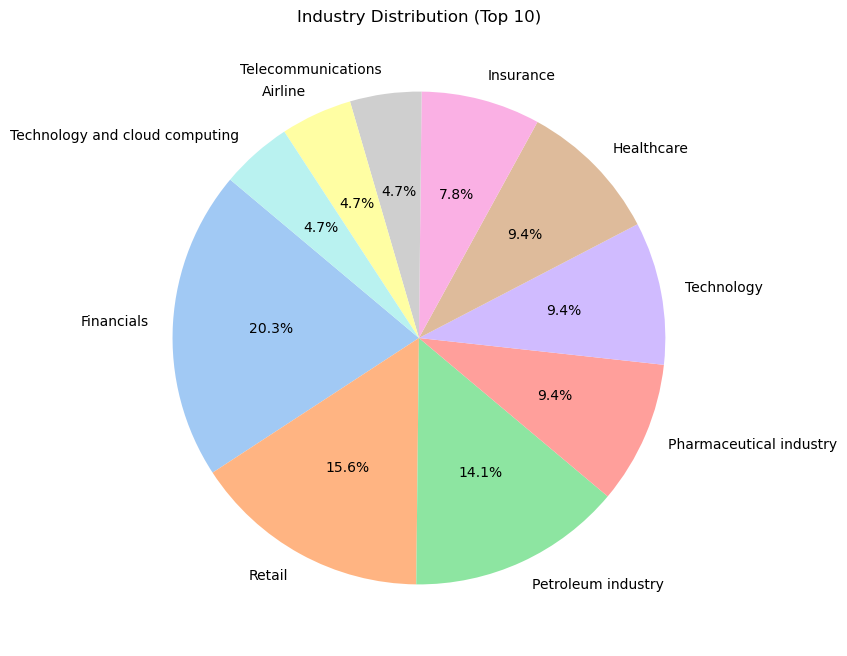

In [52]:
industry_counts = df['Industry'].value_counts()
plt.figure(figsize = (8,8))
plt.pie(industry_counts[:10], labels = industry_counts.index[:10], autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette('pastel'))
plt.title('Industry Distribution (Top 10)')
plt.show()

In [50]:
df['Industry'].nunique()

37

In [58]:
df['Industry'].unique()

array(['Retail', 'Retail and cloud computing', 'Electronics industry',
       'Healthcare', 'Conglomerate', 'Petroleum industry',
       'Technology and cloud computing', 'Health', 'Pharmacy wholesale',
       'Financial services', 'Health insurance', 'Automotive industry',
       'Financials', 'Pharmaceutical industry', 'Technology',
       'Telecommunications', 'Conglomerate and telecommunications',
       'Automotive and energy', 'Food industry', 'Beverage',
       'Transportation', 'Media', 'Consumer products manufacturing',
       'Aerospace and defense', 'Food service', 'Financial', 'Machinery',
       'Insurance', 'Agriculture manufacturing', 'Airline', 'Infotech',
       'Telecom hardware manufacturing', 'Food processing', 'Apparel',
       'Energy trading', 'Agriculture cooperative', 'Chemical industry'],
      dtype=object)

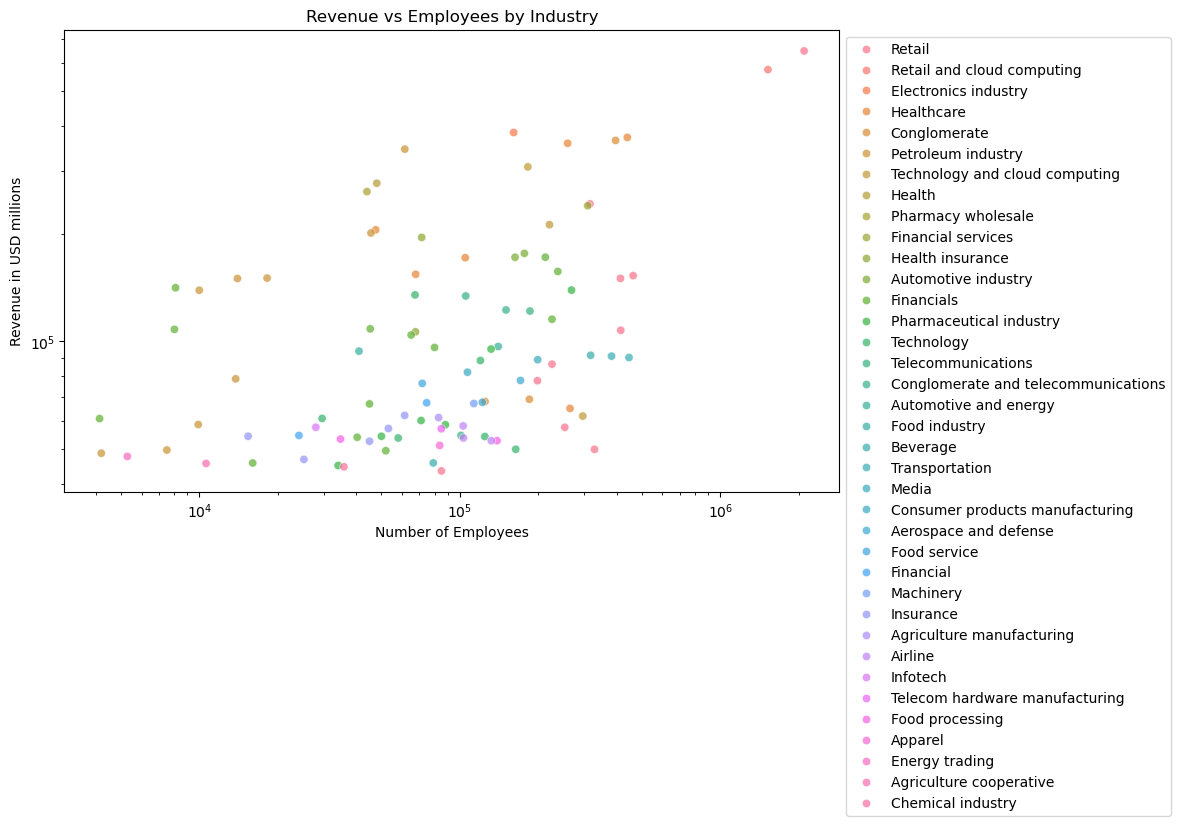

In [63]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'Employees', y = 'Revenue_(USD_millions)', hue = 'Industry', alpha = 0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Employees')
plt.ylabel('Revenue in USD millions')
plt.title('Revenue vs Employees by Industry')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()